<a href="https://colab.research.google.com/github/johnjoel2001/Heart-disease-prediction-with-Pytorch/blob/main/Heart_disease_prediction_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('heart-uci.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
X=df.drop('target',axis=1).values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
Y=df['target'].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train=torch.FloatTensor(X_train)
Y_train=torch.LongTensor(Y_train)
X_test=torch.FloatTensor(X_test)
Y_test=torch.LongTensor(Y_test)

In [ ]:
df.shape

(303, 14)

In [ ]:
class ANN(nn.Module):
  def __init__(self,input_features=13,hidden1=20,hidden2=20,output_features=2):
    super().__init__()
    self.connected_1=nn.Linear(input_features,hidden1)
    self.connected_2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,output_features)
  def forward(self,x):
    x=f.relu(self.connected_1(x))
    x=f.relu(self.connected_2(x))
    x=self.out(x)
    return x

In [ ]:
torch.manual_seed(10)
model=ANN()

In [ ]:
model.parameters

<bound method Module.parameters of ANN(
  (connected_1): Linear(in_features=13, out_features=20, bias=True)
  (connected_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=1000
losses=[]
for i in range(epochs):
  i=i+1
  Ypred=model.forward(X_train)
  loss=loss_function(Ypred,Y_train)
  losses.append(loss)
  if i%10==1:
    print('Epoch number:{} and loss:{}'.format(i,loss))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number:1 and loss:0.24842894077301025
Epoch number:11 and loss:0.25335171818733215
Epoch number:21 and loss:0.2275337129831314
Epoch number:31 and loss:0.22414931654930115
Epoch number:41 and loss:0.2378043532371521
Epoch number:51 and loss:0.23589129745960236
Epoch number:61 and loss:0.22035445272922516
Epoch number:71 and loss:0.2410432994365692
Epoch number:81 and loss:0.23090146481990814
Epoch number:91 and loss:0.21507300436496735
Epoch number:101 and loss:0.26477357745170593
Epoch number:111 and loss:0.2608896791934967
Epoch number:121 and loss:0.23606926202774048
Epoch number:131 and loss:0.23459617793560028
Epoch number:141 and loss:0.2254595011472702
Epoch number:151 and loss:0.21497976779937744
Epoch number:161 and loss:0.20962785184383392
Epoch number:171 and loss:0.2054622769355774
Epoch number:181 and loss:0.20103202760219574
Epoch number:191 and loss:0.2013302743434906
Epoch number:201 and loss:0.19729575514793396
Epoch number:211 and loss:0.20079810917377472
Epoch 

Text(0, 0.5, 'Loss')

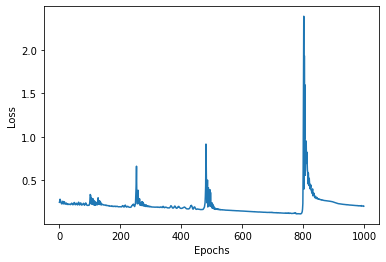

In [ ]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
#Predictions in X_test data
predictions=[]
with torch.no_grad():
  for i,data in enumerate(X_test):
    Ypred=model(data)
    predictions.append(Ypred.argmax().item())

In [ ]:
predictions

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

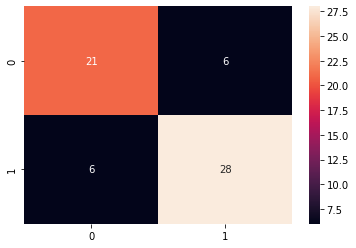

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,predictions)
sns.heatmap(cm,annot=True)

In [ ]:
print(accuracy_score(Y_test,predictions))

0.8032786885245902


In [ ]:
list(df.iloc[0,:-1]) # Selecting a row

[63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0]

In [ ]:
list1=[63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0]

In [ ]:
list1=torch.Tensor(list1)

In [ ]:
with torch.no_grad():
  print(model(list1).argmax().item())

1


**The person has heart disease**